In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### Import, explore, and clean Crash Data

In [61]:
#import Crash DataFrame 
crash_df = pd.read_csv('data/Traffic_Crashes_-_Crashes.csv')

In [62]:
crash_df

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,0001dc2c34878baec9b7223e7ead101e0487e2e994c977...,JF221668,NaN,04/27/2022 09:30:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",04/27/2022 09:30:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1325,W,ALTGELD ST,1932.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,2.0,0.0,9,4,4,41.926951,-87.661559,POINT (-87.661558949813 41.926951230142)
1,00554edcbf68c6eb4d438e92ce71a593e858971fd885a4...,JF228356,NaN,05/03/2022 06:40:00 AM,15,OTHER REG. SIGN,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,ONE-WAY,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",05/03/2022 06:50:00 AM,FAILING TO YIELD RIGHT-OF-WAY,FAILING TO YIELD RIGHT-OF-WAY,5543,W,WRIGHTWOOD AVE,2515.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,5.0,0.0,6,3,5,41.927526,-87.765423,POINT (-87.765422741103 41.927525861297)
2,00bf78dfa54ff84306859dc5d220341f1891eaf5fcf6a6...,JF213955,NaN,04/20/2022 04:32:00 PM,15,OTHER,OTHER,CLEAR,DAYLIGHT,REAR TO FRONT,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",04/20/2022 04:47:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,5450,S,MICHIGAN AVE,225.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,16,4,4,41.794998,-87.622620,POINT (-87.622620128003 41.794997895717)
3,01724d7f66bc7b4463e1b14763481e7b117aba8ce71722...,JF229048,NaN,05/03/2022 04:00:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",05/03/2022 05:00:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,1900,S,SANGAMON ST,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,3,5,41.856651,-87.650056,POINT (-87.650055763329 41.856651070773)
4,01e4318bd7e236cff2d73464eea0eda191bc92a2b56dd7...,JF228282,NaN,05/03/2022 02:00:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,Y,NaN,Y,"OVER $1,500",05/03/2022 03:40:00 AM,DISREGARDING TRAFFIC SIGNALS,NOT APPLICABLE,601,W,79TH ST,621.0,NaN,NaN,NaN,NaN,NaN,NaN,2,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,1.0,0.0,2,3,5,41.750602,-87.639286,POINT (-87.639285752914 41.750602012464)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617630,cf0c350753ba62e99a06f77de5947b775b9e55917bd66b...,JF230794,NaN,05/05/2022 07:27:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",05/05/2022 08:05:00 AM,IMPROPER TURNING/NO SIGNAL,NOT APPLICABLE,4300,S,CICERO AVE,814.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,7,5,5,41.814837,-87

In [63]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617635 entries, 0 to 617634
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                617635 non-null  object 
 1   RD_NO                          613430 non-null  object 
 2   CRASH_DATE_EST_I               46709 non-null   object 
 3   CRASH_DATE                     617635 non-null  object 
 4   POSTED_SPEED_LIMIT             617635 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         617635 non-null  object 
 6   DEVICE_CONDITION               617635 non-null  object 
 7   WEATHER_CONDITION              617635 non-null  object 
 8   LIGHTING_CONDITION             617635 non-null  object 
 9   FIRST_CRASH_TYPE               617635 non-null  object 
 10  TRAFFICWAY_TYPE                617635 non-null  object 
 11  LANE_CNT                       198984 non-null  float64
 12  ALIGNMENT                     

In [64]:
crash_df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,617635.000000,1.989840e+05,617635.000000,617630.000000,617635.000000,616356.000000,616356.000000,616356.000000,616356.000000,616356.000000,616356.000000,616356.0,617635.000000,617635.000000,617635.000000,613890.000000,613890.000000
mean,28.346642,1.333148e+01,3678.783613,1238.055616,2.034274,0.182679,0.001157,0.019683,0.102498,0.059341,2.012392,0.0,13.222879,4.127480,6.595755,41.854467,-87.673259
std,6.328804,2.961787e+03,2903.935419,705.712579,0.450734,0.554450,0.036921,0.163801,0.412506,0.312536,1.161137,0.0,5.538206,1.980342,3.449722,0.331865,0.673988
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1230.000000,712.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.780960,-87.721366
50%,30.000000,2.000000e+00,3200.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874570,-87.673567
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.923961,-87.632862
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,7.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [65]:
#Drop Irrelevant columns 
crash_df.drop(['RD_NO', 'LANE_CNT','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_DATE_EST_I','TRAFFICWAY_TYPE','ALIGNMENT','ROAD_DEFECT','REPORT_TYPE','DATE_POLICE_NOTIFIED','STREET_NO','STREET_DIRECTION','STREET_NAME','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','BEAT_OF_OCCURRENCE','WORK_ZONE_TYPE','WORKERS_PRESENT_I','INJURIES_TOTAL','INJURIES_FATAL','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NON_INCAPACITATING','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','LATITUDE','LONGITUDE','LOCATION'], axis=1, inplace=True)

In [66]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617635 entries, 0 to 617634
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          617635 non-null  object 
 1   CRASH_DATE               617635 non-null  object 
 2   POSTED_SPEED_LIMIT       617635 non-null  int64  
 3   WEATHER_CONDITION        617635 non-null  object 
 4   LIGHTING_CONDITION       617635 non-null  object 
 5   FIRST_CRASH_TYPE         617635 non-null  object 
 6   ROADWAY_SURFACE_COND     617635 non-null  object 
 7   CRASH_TYPE               617635 non-null  object 
 8   INTERSECTION_RELATED_I   141169 non-null  object 
 9   NOT_RIGHT_OF_WAY_I       29093 non-null   object 
 10  HIT_AND_RUN_I            189309 non-null  object 
 11  DAMAGE                   617635 non-null  object 
 12  PRIM_CONTRIBUTORY_CAUSE  617635 non-null  object 
 13  NUM_UNITS                617635 non-null  int64  
 14  MOST

In [67]:
#Fill/Drop relevant nulls 
crash_df["INTERSECTION_RELATED_I"].fillna("Unknown", inplace=True)
crash_df["NOT_RIGHT_OF_WAY_I"].fillna("Unknown", inplace=True)
crash_df["HIT_AND_RUN_I"].fillna("Unknown", inplace=True)
crash_df["MOST_SEVERE_INJURY"].fillna("Unknown", inplace=True)
crash_df.dropna(subset=["INJURIES_INCAPACITATING"], inplace=True)

<AxesSubplot:xlabel='DAMAGE', ylabel='Count'>

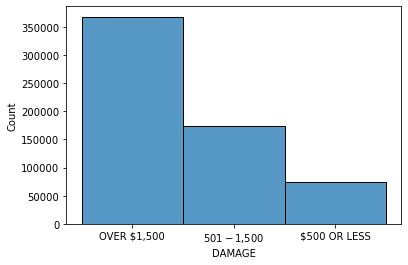

In [103]:
sns.histplot(crash_df['DAMAGE'])

### Import, explore, and clean People DataFrame

In [68]:
#import People DataFrame 
people_df = pd.read_csv('data/Traffic_Crashes_-_People.csv')

C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (20,24,25,26,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [69]:
#people_df

In [70]:
#people_df.info()

In [71]:
#Drop irrelevant columns
people_df.drop(['RD_NO', 'CRASH_DATE', 'SEAT_NO','CITY','STATE','ZIPCODE','DRIVERS_LICENSE_STATE','DRIVERS_LICENSE_CLASS','EJECTION','INJURY_CLASSIFICATION','HOSPITAL','EMS_AGENCY','EMS_RUN_NO','PEDPEDAL_ACTION','PEDPEDAL_VISIBILITY','PEDPEDAL_LOCATION','BAC_RESULT','BAC_RESULT VALUE','CELL_PHONE_USE'], axis=1, inplace=True)

In [72]:
#Remove nulls from relevant rows 
people_df.dropna(subset=["VEHICLE_ID"], inplace=True)
people_df.dropna(subset=["SEX"], inplace=True)
people_df.dropna(subset=["SAFETY_EQUIPMENT"], inplace=True)
people_df.dropna(subset=["AIRBAG_DEPLOYED"], inplace=True)
people_df.dropna(subset=["DRIVER_ACTION"], inplace=True)
people_df.dropna(subset=["DRIVER_VISION"], inplace=True)
people_df.dropna(subset=["PHYSICAL_CONDITION"], inplace=True)
people_df.dropna(subset=["AGE"], inplace=True)

In [73]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777535 entries, 0 to 1364551
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PERSON_ID           777535 non-null  object 
 1   PERSON_TYPE         777535 non-null  object 
 2   CRASH_RECORD_ID     777535 non-null  object 
 3   VEHICLE_ID          777535 non-null  float64
 4   SEX                 777535 non-null  object 
 5   AGE                 777535 non-null  float64
 6   SAFETY_EQUIPMENT    777535 non-null  object 
 7   AIRBAG_DEPLOYED     777535 non-null  object 
 8   DRIVER_ACTION       777535 non-null  object 
 9   DRIVER_VISION       777535 non-null  object 
 10  PHYSICAL_CONDITION  777535 non-null  object 
dtypes: float64(2), object(9)
memory usage: 71.2+ MB


### Import, explore, and clean Car DataFrame

In [74]:
car_df = pd.read_csv('data/Traffic_Crashes_-_Vehicles.csv')

C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,60,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [75]:
#car_df

In [76]:
#car_df.info()

In [77]:
#Create new Car DataFrame with relevant columns 
clean_car_df = car_df[['CRASH_RECORD_ID','UNIT_TYPE','MAKE','MODEL','VEHICLE_YEAR','VEHICLE_DEFECT','VEHICLE_TYPE','VEHICLE_USE','MANEUVER', 'TOWED_I','EXCEED_SPEED_LIMIT_I']]

In [78]:
#clean_car_df

In [79]:
#clean_car_df.info()

In [80]:
#Drop nulls 
clean_car_df.dropna(subset=["UNIT_TYPE"], inplace=True)
clean_car_df.dropna(subset=["MAKE"], inplace=True)
clean_car_df.dropna(subset=["MODEL"], inplace=True)
clean_car_df.dropna(subset=["VEHICLE_YEAR"], inplace=True)
clean_car_df.dropna(subset=["VEHICLE_DEFECT"], inplace=True)
clean_car_df.dropna(subset=["VEHICLE_USE"], inplace=True)
clean_car_df.dropna(subset=["MANEUVER"], inplace=True)
clean_car_df["TOWED_I"].fillna("Unknown", inplace=True)
clean_car_df["EXCEED_SPEED_LIMIT_I"].fillna("Unknown", inplace=True)

<ipython-input-80-557712eb0bee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_car_df.dropna(subset=["UNIT_TYPE"], inplace=True)
<ipython-input-80-557712eb0bee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_car_df.dropna(subset=["MAKE"], inplace=True)
<ipython-input-80-557712eb0bee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_car_df.dropna(subset=["MODEL"], inplace=True)
<ipython-input-80-557712eb0bee>:5: Se

In [81]:
clean_car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035864 entries, 0 to 1266485
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CRASH_RECORD_ID       1035864 non-null  object 
 1   UNIT_TYPE             1035864 non-null  object 
 2   MAKE                  1035864 non-null  object 
 3   MODEL                 1035864 non-null  object 
 4   VEHICLE_YEAR          1035864 non-null  float64
 5   VEHICLE_DEFECT        1035864 non-null  object 
 6   VEHICLE_TYPE          1035864 non-null  object 
 7   VEHICLE_USE           1035864 non-null  object 
 8   MANEUVER              1035864 non-null  object 
 9   TOWED_I               1035864 non-null  object 
 10  EXCEED_SPEED_LIMIT_I  1035864 non-null  object 
dtypes: float64(1), object(10)
memory usage: 94.8+ MB


### Merge Crash, People, and Car DataFrames, then explore and clean new DataFrame

In [82]:
#merge crash data and people data 
crash_people_df = pd.merge(crash_df,people_df, how='left',left_on = 'CRASH_RECORD_ID', right_on = "CRASH_RECORD_ID", indicator=True)

#remove duplicates 
crash_people_df.drop_duplicates(subset = 'CRASH_RECORD_ID', inplace = True)

In [83]:
#rename '_merge' column to 'Check', necessary for second merge 
crash_people_df.rename(columns = {'_merge':'Check'}, inplace = True)

In [84]:
#Merge crash, people, and car DataFrames together(CPC) 
cpc_df = pd.merge(crash_people_df, clean_car_df, how='left',left_on = 'CRASH_RECORD_ID', right_on = "CRASH_RECORD_ID", indicator=True)

#Drop duplicates 
cpc_df.drop_duplicates(subset = 'CRASH_RECORD_ID', inplace = True)

In [85]:
pd.set_option('display.max_columns', None)

In [86]:
cpc_df

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,PERSON_ID,PERSON_TYPE,VEHICLE_ID,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,Check,UNIT_TYPE,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,MANEUVER,TOWED_I,EXCEED_SPEED_LIMIT_I,_merge
0,0001dc2c34878baec9b7223e7ead101e0487e2e994c977...,04/27/2022 09:30:00 AM,20,CLEAR,DAYLIGHT,ANGLE,DRY,INJURY AND / OR TOW DUE TO CRASH,Unknown,Unknown,Unknown,"OVER $1,500",UNABLE TO DETERMINE,2,NONINCAPACITATING INJURY,0.0,9,4,4,O1324770,DRIVER,1258370.0,M,24.0,USAGE UNKNOWN,DID NOT DEPLOY,UNKNOWN,UNKNOWN,NORMAL,both,DRIVER,TOYOTA,RAV4,2007.0,UNKNOWN,PASSENGER,PERSONAL,STRAIGHT AHEAD,Unknown,Unknown,both
2,00554edcbf68c6eb4d438e92ce71a593e858971fd885a4...,05/03/2022 06:40:00 AM,15,RAIN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,WET,INJURY AND / OR TOW DUE TO CRASH,Unknown,Unknown,Unknown,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,3,NO INDICATION OF INJURY,0.0,6,3,5,O1328703,DRIVER,1262176.0,F,20.0,SAFETY BELT USED,DID NOT DEPLOY,FAILED TO YIELD,UNKNOWN,NORMAL,both,DRIVER,NISSAN,VERSA,2007.0,NONE,PASSENGER,PERSONAL,ENTERING TRAFFIC LANE FROM PARKING,Y,Unknown,both
5,00bf78dfa54ff84306859dc5d220341f1891eaf5fcf6a6...,04/20/2022 04:32:00 PM,15,CLEAR,DAYLIGHT,REAR TO FRONT,DRY,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,"OVER $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,16,4,4,O1320543,DRIVER,1254277.0,M,30.0,USAGE UNKNOWN,DID NOT DEPLOY,IMPROPER BACKING,UNKNOWN,UNKNOWN,both,DRIVER,JEEP,COMPASS,2012.0,WINDOWS,SPORT UTILITY VEHICLE (SUV),PERSONAL,BACKING,Unknown,Unknown,both
7,01724d7f66bc7b4463e1b14763481e7b117aba8ce71722...,05/03/2022 04:00:00 PM,30,RAIN,DAYLIGHT,PARKED MOTOR VEHICLE,WET,NO INJURY / DRIVE AWAY,Unknown,Unknown,Y,"$501 - $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,16,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,PARKED,BUICK,ENCLAVE,2019.0,UNKNOWN,PASSENGER,NOT IN USE,PARKED,Unknown,Unknown,both
8,01e4318bd7e236cff2d73464eea0eda191bc92a2b56dd7...,05/03/2022 02:00:00 AM,30,RAIN,"DARKNESS, LIGHTED ROAD",ANGLE,WET,INJURY AND / OR TOW DUE TO CRASH,Y,Unknown,Y,"OVER $1,500",DISREGARDING TRAFFIC SIGNALS,2,"REPORTED, NOT EVIDENT",0.0,2,3,5,O1328660,DRIVER,1262132.0,M,41.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NOT OBSCURED,NORMAL,both,DRIVER,HYUNDAI,SONATA,2013.0,NONE,PASSENGER,PERSONAL,STRAIGHT AHEAD,Unknown,Unknown,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059534,cf0c350753ba62e99a06f77de5947b775b9e55917bd66b...,05/05/2022 07:27:00 AM,30,CLEAR,DAYLIGHT,TURNING,DRY,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,2,NO INDICATION OF INJURY,0.0,7,5,5,O1330248,DRIVER,1263658.0,F,40.0,SAFETY BELT USED,NOT APPLICABLE,IMPROPER TURN,NOT OBSCURED,NORMAL,both,DRIVER,HONDA,CR-V,2013.0,NONE,PASSENGER,PERSONAL,TURNING RIGHT,Unknown,Unknown,both
1059536,d33181def1c0c3a57ecabef00a109440b361c01fb392bf...,05/05/2022 07:40:00 AM,30,CLEAR,DAYLIGHT,TURNING,DRY,INJURY AND / OR TOW DUE TO CRASH,Unknown,Unknown,Unknown,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,2,NO INDICATION OF INJURY,0.0,7,5,5,O1330195,DRIVER,1263606.0,M,38.0,USAGE UNKNOWN,NOT APPLICABLE,UNKNOWN,UNKNOWN,NORMAL,both,DRIVER,CHEVROLET,CAMARO,2018.0,UNKNOWN,PASSENGER,PERSONAL,STRAIGHT AHEAD,Unknown,Unknown,both
1059538,ed89460623860d25ddd9dcb74226b8f691f9392d81f19f...,05/05/2022 09:09:00 AM,30,CLEAR,DAYLIGHT,REAR END,DRY,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,"OVER $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,9,5,5,O1330245,DRIVER,1263662.0,M,35.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NOT OBSCURED,

In [87]:
cpc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616356 entries, 0 to 1059541
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   CRASH_RECORD_ID          616356 non-null  object  
 1   CRASH_DATE               616356 non-null  object  
 2   POSTED_SPEED_LIMIT       616356 non-null  int64   
 3   WEATHER_CONDITION        616356 non-null  object  
 4   LIGHTING_CONDITION       616356 non-null  object  
 5   FIRST_CRASH_TYPE         616356 non-null  object  
 6   ROADWAY_SURFACE_COND     616356 non-null  object  
 7   CRASH_TYPE               616356 non-null  object  
 8   INTERSECTION_RELATED_I   616356 non-null  object  
 9   NOT_RIGHT_OF_WAY_I       616356 non-null  object  
 10  HIT_AND_RUN_I            616356 non-null  object  
 11  DAMAGE                   616356 non-null  object  
 12  PRIM_CONTRIBUTORY_CAUSE  616356 non-null  object  
 13  NUM_UNITS                616356 non-null  i

In [88]:
#create a new column with only the top 100 makes, and an 'Other' category for all the others 
#chanaged from 100 to 150
TOP_MAKES = cpc_df['MAKE'].value_counts()
threshold = 150
cpc_df['TOP_MAKES'] = np.where(cpc_df['MAKE'].isin(TOP_MAKES.index[TOP_MAKES >= threshold ]), cpc_df['MAKE'], 'other')

In [89]:
#Use map function to create a binary target column 
#helps to create more balanced dataset 
map = {"OVER $1,500":1,"$501 - $1,500": 0, "$500 OR LESS": 0}

cpc_df["Target"] = cpc_df["DAMAGE"].map(map)

In [90]:
#check for balanced dataset 
cpc_df["Target"].value_counts(normalize=True)

1    0.597705
0    0.402295
Name: Target, dtype: float64

In [91]:
#cpc_df.info()

In [92]:
#drop irrelevant columns 
#removed 'maneuvers' from this list (so it is now included in the data)
cpc_df.drop(['PERSON_ID','CRASH_RECORD_ID','DAMAGE','CRASH_DATE','PERSON_TYPE', 'VEHICLE_ID','SAFETY_EQUIPMENT','DRIVER_VISION','Check','_merge','MODEL','MAKE','VEHICLE_DEFECT','VEHICLE_USE','EXCEED_SPEED_LIMIT_I'], axis=1, inplace=True)

In [93]:
#drop nulls 
cpc_df.dropna(subset=["SEX"], inplace=True)
cpc_df.dropna(subset=["VEHICLE_YEAR"], inplace=True)

In [94]:
cpc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481373 entries, 0 to 1059540
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   POSTED_SPEED_LIMIT       481373 non-null  int64  
 1   WEATHER_CONDITION        481373 non-null  object 
 2   LIGHTING_CONDITION       481373 non-null  object 
 3   FIRST_CRASH_TYPE         481373 non-null  object 
 4   ROADWAY_SURFACE_COND     481373 non-null  object 
 5   CRASH_TYPE               481373 non-null  object 
 6   INTERSECTION_RELATED_I   481373 non-null  object 
 7   NOT_RIGHT_OF_WAY_I       481373 non-null  object 
 8   HIT_AND_RUN_I            481373 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  481373 non-null  object 
 10  NUM_UNITS                481373 non-null  int64  
 11  MOST_SEVERE_INJURY       481373 non-null  object 
 12  INJURIES_INCAPACITATING  481373 non-null  float64
 13  CRASH_HOUR               481373 non-null  int64  
 14  CRA

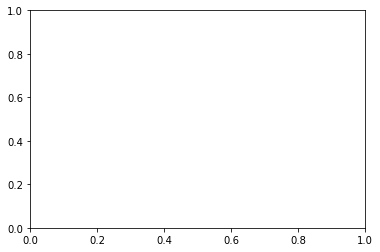

In [104]:
fig, ax = plt.subplots()


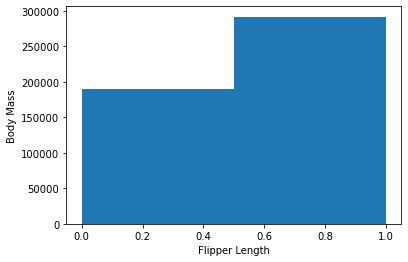

In [106]:
fig, ax = plt.subplots()
ax.hist(cpc_df['Target'], bins = 2)

ax.set_xlabel('Flipper Length')
ax.set_ylabel('Body Mass')

plt.show()

Text(0.5, 1.0, 'Cost Of Repair For Car Crashes')

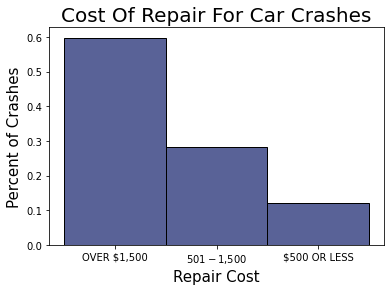

In [119]:
damage_density = sns.histplot(crash_df['DAMAGE'], stat = 'density', color = '#212d74')
damage_density.set_xlabel("Repair Cost", fontsize = 15)
damage_density.set_ylabel("Percent of Crashes", fontsize = 15)
damage_density.set_title("Cost Of Repair For Car Crashes", fontsize = 20)

In [128]:
high_cost_df =  cpc_df[cpc_df['Target'] == 1]
low_cost_df = cpc_df[cpc_df['Target'] == 0]

In [129]:
high_cost_df.head()

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,SEX,AGE,AIRBAG_DEPLOYED,DRIVER_ACTION,PHYSICAL_CONDITION,UNIT_TYPE,VEHICLE_YEAR,VEHICLE_TYPE,MANEUVER,TOWED_I,TOP_MAKES,Target
0,20,CLEAR,DAYLIGHT,ANGLE,DRY,INJURY AND / OR TOW DUE TO CRASH,Unknown,Unknown,Unknown,UNABLE TO DETERMINE,2,NONINCAPACITATING INJURY,0.0,9,4,4,M,24.0,DID NOT DEPLOY,UNKNOWN,NORMAL,DRIVER,2007.0,PASSENGER,STRAIGHT AHEAD,Unknown,TOYOTA,1
2,15,RAIN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,WET,INJURY AND / OR TOW DUE TO CRASH,Unknown,Unknown,Unknown,FAILING TO YIELD RIGHT-OF-WAY,3,NO INDICATION OF INJURY,0.0,6,3,5,F,20.0,DID NOT DEPLOY,FAILED TO YIELD,NORMAL,DRIVER,2007.0,PASSENGER,ENTERING TRAFFIC LANE FROM PARKING,Y,NISSAN,1
5,15,CLEAR,DAYLIGHT,REAR TO FRONT,DRY,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,16,4,4,M,30.0,DID NOT DEPLOY,IMPROPER BACKING,UNKNOWN,DRIVER,2012.0,SPORT UTILITY VEHICLE (SUV),BACKING,Unknown,JEEP,1
8,30,RAIN,"DARKNESS, LIGHTED ROAD",ANGLE,WET,INJURY AND / OR TOW DUE TO CRASH,Y,Unknown,Y,DISREGARDING TRAFFIC SIGNALS,2,"REPORTED, NOT EVIDENT",0.0,2,3,5,M,41.0,DID NOT DEPLOY,NONE,NORMAL,DRIVER,2013.0,PASSENGER,STRAIGHT AHEAD,Unknown,HYUNDAI,1
10,30,CLEAR,DAYLIGHT,TURNING,DRY,INJURY AND / OR TOW DUE TO CRASH,Unknown,Unknown,Unknown,FAILING TO YIELD RIGHT-OF-WAY,2,NO INDICATION OF INJURY,0.0,11,6,7,F,56.0,DEPLOYMENT UNKNOWN,OTHER,NORMAL,DRIVER,2015.0,PASSENGER,U-TURN,Y,CHEVROLET,1


<AxesSubplot:xlabel='PRIM_CONTRIBUTORY_CAUSE', ylabel='Count'>

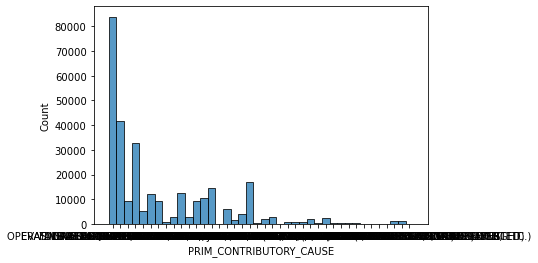

In [136]:
sns.histplot(high_cost_df['PRIM_CONTRIBUTORY_CAUSE'])

In [138]:
high_cost_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 83908
FAILING TO YIELD RIGHT-OF-WAY                                                       41815
FOLLOWING TOO CLOSELY                                                               32807
FAILING TO REDUCE SPEED TO AVOID CRASH                                              16981
IMPROPER OVERTAKING/PASSING                                                         14376
IMPROPER TURNING/NO SIGNAL                                                          12372
IMPROPER LANE USAGE                                                                 11967
NOT APPLICABLE                                                                      10556
DISREGARDING TRAFFIC SIGNALS                                                         9444
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  9386
IMPROPER BACKING                                                                     9091
WEATHER   

<AxesSubplot:xlabel='PRIM_CONTRIBUTORY_CAUSE', ylabel='Count'>

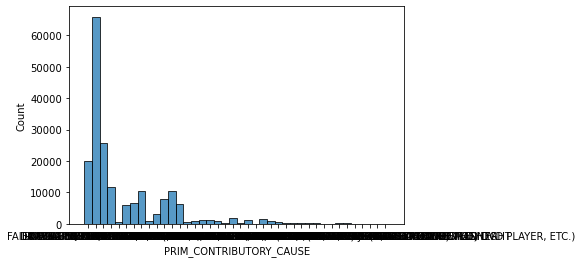

In [137]:
sns.histplot(low_cost_df['PRIM_CONTRIBUTORY_CAUSE'])

In [147]:
top_5_low = low_cost_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True)[1:6]

In [158]:
top_5_high = high_cost_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True)[1:6]
top_5_high

FAILING TO YIELD RIGHT-OF-WAY             0.143294
FOLLOWING TOO CLOSELY                     0.112425
FAILING TO REDUCE SPEED TO AVOID CRASH    0.058192
IMPROPER OVERTAKING/PASSING               0.049265
IMPROPER TURNING/NO SIGNAL                0.042397
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: float64

<AxesSubplot:title={'center':'Top 5 Primary Cause for High Cost Accidents'}>

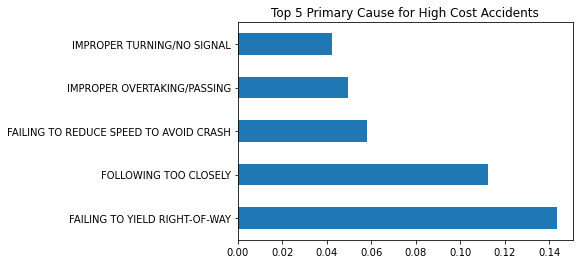

In [175]:
top_5_high.plot(kind = 'barh', title = "Top 5 Primary Cause for High Cost Accidents")

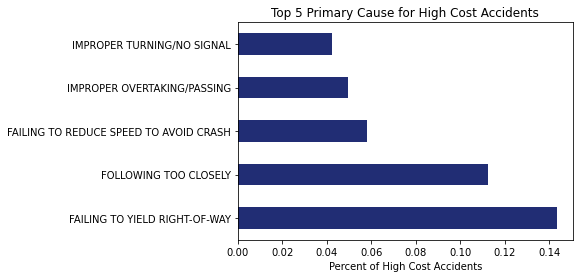

In [183]:
ax = top_5_high.plot(kind = 'barh', title = "Top 5 Primary Cause for High Cost Accidents", color = '#212d74')
ax.set_xlabel("Percent of High Cost Accidents")
patches, labels = ax.get_legend_handles_labels()


Text(0.5, 0, 'Percent of Low Cost Accidents')

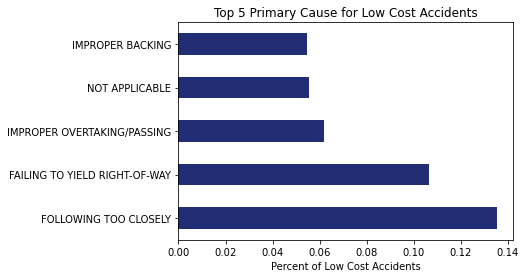

In [182]:
ax = top_5_low.plot(kind = 'barh', title = "Top 5 Primary Cause for Low Cost Accidents", color = '#212d74')
ax.set_xlabel("Percent of Low Cost Accidents")



ValueError: shape mismatch: objects cannot be broadcast to a single shape

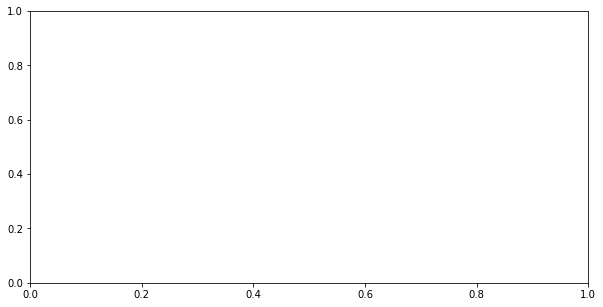

## Do Train Test Split

In [95]:
X = cpc_df.drop(columns='Target')
y = cpc_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [96]:
categorical_feature_names = [c for c in cpc_df.columns if cpc_df[c].dtype == "O"]
numerical_feature_names = ['POSTED_SPEED_LIMIT','NUM_UNITS','INJURIES_INCAPACITATING',
                           'CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH','AGE','VEHICLE_YEAR']


In [97]:
def encode_and_concat_feature_train(X_train, feature_name):
    """
    Helper function for transforming training data.  It takes in the full X dataframe and
    feature name, makes a one-hot encoder, and returns the encoder as well as the dataframe
    with that feature transformed into multiple columns of 1s and 0s
    """
    # make a one-hot encoder and fit it to the training data
    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    single_feature_df = X_train[[feature_name]]
    ohe.fit(single_feature_df)
    
    # call helper function that actually encodes the feature and concats it
    X_train = encode_and_concat_feature(X_train, feature_name, ohe)
    
    return ohe, X_train

In [98]:
def encode_and_concat_feature(X, feature_name, ohe):
    """
    Helper function for transforming a feature into multiple columns of 1s and 0s. Used
    in both training and testing steps.  Takes in the full X dataframe, feature name, 
    and encoder, and returns the dataframe with that feature transformed into multiple
    columns of 1s and 0s
    """
    # create new one-hot encoded df based on the feature
    single_feature_df = X[[feature_name]]
    feature_array = ohe.transform(single_feature_df).toarray()
    ohe_df = pd.DataFrame(feature_array, columns=ohe.categories_[0], index=X.index)
    
    # drop the old feature from X and concat the new one-hot encoded df
    X = X.drop(feature_name, axis=1)
    X = pd.concat([X, ohe_df], axis=1)
    
    return X

In [99]:
encoders = {}

for categorical_feature in categorical_feature_names:
    ohe, X_train = encode_and_concat_feature_train(X_train, categorical_feature)
    encoders[categorical_feature] = ohe

In [100]:
X_train

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,VEHICLE_YEAR,"BLOWING SAND, SOIL, DIRT",BLOWING SNOW,CLEAR,CLOUDY/OVERCAST,FOG/SMOKE/HAZE,FREEZING RAIN/DRIZZLE,OTHER,RAIN,SEVERE CROSS WIND GATE,SLEET/HAIL,SNOW,UNKNOWN,DARKNESS,"DARKNESS, LIGHTED ROAD",DAWN,DAYLIGHT,DUSK,UNKNOWN,ANGLE,ANIMAL,FIXED OBJECT,HEAD ON,OTHER NONCOLLISION,OTHER OBJECT,OVERTURNED,PARKED MOTOR VEHICLE,PEDALCYCLIST,PEDESTRIAN,REAR END,REAR TO FRONT,REAR TO REAR,REAR TO SIDE,SIDESWIPE OPPOSITE DIRECTION,SIDESWIPE SAME DIRECTION,TRAIN,TURNING,DRY,ICE,OTHER,"SAND, MUD, DIRT",SNOW OR SLUSH,UNKNOWN,WET,INJURY AND / OR TOW DUE TO CRASH,NO INJURY / DRIVE AWAY,N,Unknown,Y,N,Unknown,Y,N,Unknown,Y,ANIMAL,BICYCLE ADVANCING LEGALLY ON RED LIGHT,CELL PHONE USE OTHER THAN TEXTING,DISREGARDING OTHER TRAFFIC SIGNS,DISREGARDING ROAD MARKINGS,DISREGARDING STOP SIGN,DISREGARDING TRAFFIC SIGNALS,DISREGARDING YIELD SIGN,DISTRACTION - FROM INSIDE VEHICLE,DISTRACTION - FROM OUTSIDE VEHICLE,"DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",DRIVING ON WRONG SIDE/WRONG WAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,EQUIPMENT - VEHICLE CONDITION,"EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",EXCEEDING AUTHORIZED SPEED LIMIT,EXCEEDING SAFE SPEED FOR CONDITIONS,FAILING TO REDUCE SPEED TO AVOID CRASH,FAILING TO YIELD RIGHT-OF-WAY,FOLLOWING TOO CLOSELY,HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),IMPROPER BACKING,IMPROPER LANE USAGE,IMPROPER OVERTAKING/PASSING,IMPROPER TURNING/NO SIGNAL,MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,NOT APPLICABLE,OBSTRUCTED CROSSWALKS,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PASSING STOPPED SCHOOL BUS,PHYSICAL CONDITION OF DRIVER,RELATED TO BUS STOP,ROAD CONSTRUCTION/MAINTENANCE,ROAD ENGINEERING/SURFACE/MARKING DEFECTS,TEXTING,TURNING RIGHT ON RED,UNABLE TO DETERMINE,UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",WEATHER,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT",F,M,X,"DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)","DEPLOYED, COMBINATION","DEPLOYED, FRONT","DEPLOYED, SIDE",DEPLOYMENT UNKNOWN,DID NOT DEPLOY,NOT APPLICABLE,CELL PHONE USE OTHER THAN TEXTING,DISREGARDED CONTROL DEVICES,EMERGENCY VEHICLE ON CALL,EVADING POLICE VEHICLE,FAILED TO YIELD,FOLLOWED TOO CLOSELY,IMPROPER BACKING,IMPROPER LANE CHANGE,IMPROPER PARKING,IMPROPER PASSING,IMPROPER TURN,LICENSE RESTRICTIONS,NONE,OTHER,OVERCORRECTED,STOPPED SCHOOL BUS,TEXTING,TOO FAST FOR CONDITIONS,UNKNOWN,WRONG WAY/SIDE,EMOTIONAL,FATIGUED/ASLEEP,HAD BEEN DRINKING,ILLNESS/FAINTED,IMPAIRED - ALCOHOL,IMPAIRED - ALCOHOL AND DRUGS,IMPAIRED - DRUGS,MEDICATED,NORMAL,OTHER,REMOVED BY EMS,UNKNOWN,DISABLED VEHICLE,DRIVER,DRIVERLESS,NON-CONTACT VEHICLE,PARKED,3-WHEELED MOTORCYCLE (2 REAR WHEELS),ALL-TERRAIN VEHICLE (ATV),AUTOCYCLE,BUS OVER 15 PASS.,BUS UP TO 15 PASS.,FARM EQUIPMENT,MOPED OR MOTORIZED BICYCLE,MOTOR DRIVEN CYCLE,MOTORCYCLE (OVER 150CC),OTHER,OTHER VEHICLE WITH TRAILER,PASSENGER,PICKUP,RECREATIONAL OFF-HIGHWAY VEHICLE (ROV),SINGLE UNIT TRUCK WITH TRAILER,SPORT UTILITY VEHICLE (SUV),TRACTOR W/ SEMI-TRAILER,TRACTOR W/O SEMI-TRAILER,TRUCK - SINGLE UNIT,UNKNOWN/NA,VAN/MINI-VAN,AVOIDING VEHICLES/OBJECTS,BACKING,CHANGING LANES,DISABLED,DIVERGING,DRIVERLESS,DRIVING WRONG WAY,ENTER FROM DRIVE/ALLEY,ENTERING TRAFFIC LANE FROM PARKING,LEAVING TRAFFIC LANE TO PARK,MERGING,NEGOTIATING A CURVE,OTHER,PARKED,PARKED IN TRAFFIC LANE,PASSING/OVERTAKING,SKIDDING/CONTROL LOSS,SLOW/STOP - LEFT TURN,SLOW/STOP - LOAD/UNLOAD,SLOW/STOP - RIGHT TURN,SLOW/STOP IN TRAFFIC,STARTING IN TRAFFIC,STRAIGHT AHEAD,TURNING LEFT,TURNING ON RED,TURNING RIGHT,U-TURN,UNKNOWN/NA,N,Unknown,Y,ACURA,ACURA (DIV. OF AMERICAN HONDA MOTOR CO.),AUDI,AUTOCAR,BLUE BIRD BODY CO.,BLUEBIRD INTERNATIONAL,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,DODGE,FIAT,FORD,FREIGHTLINER CORP.,FREIGHTLINER CORPORATION,GENERAL MOTORS 

385098

385098

In [51]:
X = cpc_df.drop(columns='Target')
y = cpc_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [52]:
#get categorical columns
categorical_feature_names = [c for c in cpc_df.columns if cpc_df[c].dtype == "O"]
cat_cols

['WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'ROADWAY_SURFACE_COND',
 'CRASH_TYPE',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'PRIM_CONTRIBUTORY_CAUSE',
 'MOST_SEVERE_INJURY',
 'SEX',
 'AIRBAG_DEPLOYED',
 'DRIVER_ACTION',
 'PHYSICAL_CONDITION',
 'UNIT_TYPE',
 'VEHICLE_TYPE',
 'MANEUVER',
 'TOWED_I',
 'TOP_MAKES']

In [38]:
from sklearn.compose import ColumnTransformer

#create encoder object - to help convert cat. variables to new columns
encoder = OneHotEncoder(handle_unknown = 'error',
                       drop = 'first',
                       categories='auto', sparse=False)

#create columntransformer object - to help merge transformed columns
#with the rest of the dataset

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                      remainder='drop')

ct.fit(X_train)
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

In [39]:
X_train_enc

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [40]:
pd.DataFrame(X_train_enc, columns= ct.get_feature_names_out())

AttributeError: 'ColumnTransformer' object has no attribute 'get_feature_names_out'

#### Now lets scale 

In [41]:
#import sclaer 
from sklearn.preprocessing import StandardScaler 
#instantiate our scalar
scaler = StandardScaler()

#train on train data
scaler.fit(X_train_enc)

#transform both train and test data
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

In [42]:
pd.DataFrame(X_train_enc, columns=ct.get_feature_names())

,ohe__x0_BLOWING SNOW,ohe__x0_CLEAR,ohe__x0_CLOUDY/OVERCAST,ohe__x0_FOG/SMOKE/HAZE,ohe__x0_FREEZING RAIN/DRIZZLE,ohe__x0_OTHER,ohe__x0_RAIN,ohe__x0_SEVERE CROSS WIND GATE,ohe__x0_SLEET/HAIL,ohe__x0_SNOW,ohe__x0_UNKNOWN,"ohe__x1_DARKNESS, LIGHTED ROAD",ohe__x1_DAWN,ohe__x1_DAYLIGHT,ohe__x1_DUSK,ohe__x1_UNKNOWN,ohe__x2_ANIMAL,ohe__x2_FIXED OBJECT,ohe__x2_HEAD ON,ohe__x2_OTHER NONCOLLISION,ohe__x2_OTHER OBJECT,ohe__x2_OVERTURNED,ohe__x2_PARKED MOTOR VEHICLE,ohe__x2_PEDALCYCLIST,ohe__x2_PEDESTRIAN,ohe__x2_REAR END,ohe__x2_REAR TO FRONT,ohe__x2_REAR TO REAR,ohe__x2_REAR TO SIDE,ohe__x2_SIDESWIPE OPPOSITE DIRECTION,ohe__x2_SIDESWIPE SAME DIRECTION,ohe__x2_TRAIN,ohe__x2_TURNING,ohe__x3_ICE,ohe__x3_OTHER,"ohe__x3_SAND, MUD, DIRT",ohe__x3_SNOW OR SLUSH,ohe__x3_UNKNOWN,ohe__x3_WET,ohe__x4_NO INJURY / DRIVE AWAY,ohe__x5_Unknown,ohe__x5_Y,ohe__x6_Unknown,ohe__x6_Y,ohe__x7_Unknown,ohe__x7_Y,ohe__x8_BICYCLE ADVANCING LEGALLY ON RED LIGHT,ohe__x8_CELL PHONE USE OTHER THAN TEXTING,ohe__x8_DISREGARDING OTHER TRAFFIC SIGNS,ohe__x8_DISREGARDING ROAD MARKINGS,ohe__x8_DISREGARDING STOP SIGN,ohe__x8_DISREGARDING TRAFFIC SIGNALS,ohe__x8_DISREGARDING YIELD SIGN,ohe__x8_DISTRACTION - FROM INSIDE VEHICLE,ohe__x8_DISTRACTION - FROM OUTSIDE VEHICLE,"ohe__x8_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",ohe__x8_DRIVING ON WRONG SIDE/WRONG WAY,ohe__x8_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,ohe__x8_EQUIPMENT - VEHICLE CONDITION,"ohe__x8_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",ohe__x8_EXCEEDING AUTHORIZED SPEED LIMIT,ohe__x8_EXCEEDING SAFE SPEED FOR CONDITIONS,ohe__x8_FAILING TO REDUCE SPEED TO AVOID CRASH,ohe__x8_FAILING TO YIELD RIGHT-OF-WAY,ohe__x8_FOLLOWING TOO CLOSELY,ohe__x8_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),ohe__x8_IMPROPER BACKING,ohe__x8_IMPROPER LANE USAGE,ohe__x8_IMPROPER OVERTAKING/PASSING,ohe__x8_IMPROPER TURNING/NO SIGNAL,ohe__x8_MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,ohe__x8_NOT APPLICABLE,ohe__x8_OBSTRUCTED CROSSWALKS,"ohe__x8_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",ohe__x8_PASSING STOPPED SCHOOL BUS,ohe__x8_PHYSICAL CONDITION OF DRIVER,ohe__x8_RELATED TO BUS STOP,ohe__x8_ROAD CONSTRUCTION/MAINTENANCE,ohe__x8_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,ohe__x8_TEXTING,ohe__x8_TURNING RIGHT ON RED,ohe__x8_UNABLE TO DETERMINE,ohe__x8_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"ohe__x8_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",ohe__x8_WEATHER,ohe__x9_INCAPACITATING INJURY,ohe__x9_NO INDICATION OF INJURY,ohe__x9_NONINCAPACITATING INJURY,"ohe__x9_REPORTED, NOT EVIDENT",ohe__x10_M,ohe__x10_X,"ohe__x11_DEPLOYED, COMBINATION","ohe__x11_DEPLOYED, FRONT","ohe__x11_DEPLOYED, SIDE",ohe__x11_DEPLOYMENT UNKNOWN,ohe__x11_DID NOT DEPLOY,ohe__x11_NOT APPLICABLE,ohe__x12_DISREGARDED CONTROL DEVICES,ohe__x12_EMERGENCY VEHICLE ON CALL,ohe__x12_EVADING POLICE VEHICLE,ohe__x12_FAILED TO YIELD,ohe__x12_FOLLOWED TOO CLOSELY,ohe__x12_IMPROPER BACKING,ohe__x12_IMPROPER LANE CHANGE,ohe__x12_IMPROPER PARKING,ohe__x12_IMPROPER PASSING,ohe__x12_IMPROPER TURN,ohe__x12_LICENSE RESTRICTIONS,ohe__x12_NONE,ohe__x12_OTHER,ohe__x12_OVERCORRECTED,ohe__x12_STOPPED SCHOOL BUS,ohe__x12_TEXTING,ohe__x12_TOO FAST FOR CONDITIONS,ohe__x12_UNKNOWN,ohe__x12_WRONG WAY/SIDE,ohe__x13_FATIGUED/ASLEEP,ohe__x13_HAD BEEN DRINKING,ohe__x13_ILLNESS/FAINTED,ohe__x13_IMPAIRED - ALCOHOL,ohe__x13_IMPAIRED - ALCOHOL AND DRUGS,ohe__x13_IMPAIRED - DRUGS,ohe__x13_MEDICATED,ohe__x13_NORMAL,ohe__x13_OTHER,ohe__x13_REMOVED BY EMS,ohe__x13_UNKNOWN,ohe__x14_DRIVER,ohe__x14_DRIVERLESS,ohe__x14_NON-CONTACT VEHICLE,ohe__x14_PARKED,ohe__x15_ALL-TERRAIN VEHICLE (ATV),ohe__x15_AUTOCYCLE,ohe__x15_BUS OVER 15 PASS.,ohe__x15_BUS UP TO 15 PASS.,ohe__x15_FARM EQUIPMENT,ohe__x15_MOPED OR MOTORIZED BICYCLE,ohe__x15_MOTOR DRIVEN CYCLE,ohe__x15_MOTORCYCLE (OVER 150CC),ohe__x15_OTHER,ohe__x15_OTHER VEHICLE WITH TRAILER,ohe__x15_PASSENGER,ohe__x15_PICKUP,ohe__x15_RECREATIONAL OFF-HIGHWAY VEHICLE (R

#### Create Model 

In [52]:
X_train

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,ROADWAY_SURFACE_COND,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,SEX,AGE,AIRBAG_DEPLOYED,DRIVER_ACTION,PHYSICAL_CONDITION,UNIT_TYPE,VEHICLE_YEAR,VEHICLE_TYPE,MANEUVER,TOWED_I,TOP_MAKES
1008717,35,CLOUDY/OVERCAST,DAYLIGHT,REAR END,DRY,INJURY AND / OR TOW DUE TO CRASH,Unknown,Unknown,Unknown,FOLLOWING TOO CLOSELY,2,NONINCAPACITATING INJURY,0.0,9,5,12,M,24.0,"DEPLOYED, FRONT",FOLLOWED TOO CLOSELY,NORMAL,DRIVER,2006.0,PASSENGER,CHANGING LANES,Y,JEEP
960618,30,CLEAR,DAYLIGHT,ANGLE,DRY,NO INJURY / DRIVE AWAY,Y,Unknown,Unknown,FAILING TO YIELD RIGHT-OF-WAY,2,NO INDICATION OF INJURY,0.0,13,4,3,F,43.0,DID NOT DEPLOY,FAILED TO YIELD,UNKNOWN,DRIVER,2009.0,UNKNOWN/NA,STRAIGHT AHEAD,Unknown,CHEVROLET
789941,30,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRY,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,15,3,7,F,42.0,DID NOT DEPLOY,UNKNOWN,UNKNOWN,DRIVER,2014.0,SPORT UTILITY VEHICLE (SUV),LEAVING TRAFFIC LANE TO PARK,Unknown,FORD
1027685,30,CLEAR,DAYLIGHT,REAR END,DRY,INJURY AND / OR TOW DUE TO CRASH,Unknown,Unknown,Unknown,PHYSICAL CONDITION OF DRIVER,2,NONINCAPACITATING INJURY,0.0,16,5,12,M,43.0,DID NOT DEPLOY,OTHER,FATIGUED/ASLEEP,DRIVER,2002.0,PASSENGER,STRAIGHT AHEAD,N,CHEVROLET
542833,20,CLEAR,DAYLIGHT,FIXED OBJECT,ICE,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,UNABLE TO DETERMINE,1,NO INDICATION OF INJURY,0.0,14,2,1,M,25.0,DID NOT DEPLOY,UNKNOWN,NORMAL,DRIVER,2007.0,SPORT UTILITY VEHICLE (SUV),ENTER FROM DRIVE/ALLEY,Unknown,BMW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574594,30,CLEAR,DAYLIGHT,TURNING,DRY,INJURY AND / OR TOW DUE TO CRASH,Y,Unknown,Unknown,FAILING TO YIELD RIGHT-OF-WAY,2,NONINCAPACITATING INJURY,0.0,11,5,9,F,90.0,"DEPLOYED, COMBINATION",FAILED TO YIELD,NORMAL,DRIVER,2014.0,PASSENGER,TURNING LEFT,Y,NISSAN
807889,30,CLEAR,DAYLIGHT,ANGLE,WET,INJURY AND / OR TOW DUE TO CRASH,Y,Unknown,Unknown,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",3,NO INDICATION OF INJURY,0.0,17,6,8,F,20.0,DID NOT DEPLOY,FAILED TO YIELD,NORMAL,DRIVER,2002.0,PASSENGER,STRAIGHT AHEAD,Y,FORD
296347,35,CLEAR,DAYLIGHT,REAR END,DRY,INJURY AND / OR TOW DUE TO CRASH,Unknown,Unknown,Y,UNABLE TO DETERMINE,2,NONINCAPACITATING INJURY,0.0,12,3,4,F,35.0,DID NOT DEPLOY,NONE,NORMAL,DRIVER,2011.0,PASSENGER,STRAIGHT AHEAD,Y,CHEVROLET
329166,30,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,UNKNOWN,NO INJURY / DRIVE AWAY,Unknown,Unknown,Unknown,NOT APPLICABLE,2,NO INDICATION OF INJURY,0.0,9,5,1,M,34.0,DID NOT DEPLOY,UNKNOWN,UNKNOWN,DRIVER,2006.0,SPORT UTILITY VEHICLE (SUV),BACKING,Unknown,CHEVROLET


In [47]:
#create baseline model 
baseline_model = LogisticRegression(random_state=42, max_iter = 50)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train_scaled, y_train)

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

-0.6479104036181449

In [77]:
#see what our log-loss would be if our model choose the majority class 
log_loss(y_train, np.zeros(len(y_train)))

In [79]:
#evaluate 
from sklearn.metrics import r2_score

r2_score(y_train, train_preds)


0.138536904607646

In [80]:
r2_score(y_train, train_preds)

0.138536904607646

In [83]:
#visualize our residuals
import matplotlib.pyplot as plt 
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot

import yellowbrick 
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()
plt.show() 

ModuleNotFoundError: No module named 'yellowbrick'

### Create numeric feature DF for DecisionTreeClassifier 

In [41]:
#create new DF with just our numeric values
numeric_df = cpc_df[['POSTED_SPEED_LIMIT','NUM_UNITS','INJURIES_INCAPACITATING','CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH','AGE','VEHICLE_YEAR', 'Target']]

In [42]:
numeric_df

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,VEHICLE_YEAR,Target
0,20,2,0.0,9,4,4,24.0,2007.0,1
2,15,3,0.0,6,3,5,20.0,2007.0,1
6,15,2,0.0,16,4,4,30.0,2012.0,1
10,30,2,0.0,2,3,5,41.0,2013.0,1
11,30,2,0.0,15,4,4,57.0,2012.0,1
...,...,...,...,...,...,...,...,...,...
1059017,30,2,0.0,16,6,4,34.0,2006.0,1
1059019,30,2,0.0,9,1,5,36.0,2012.0,1
1059021,30,2,0.0,7,5,5,40.0,2013.0,1
1059023,30,2,0.0,7,5,5,38.0,2018.0,1


In [43]:
cpc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481160 entries, 0 to 1059025
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   POSTED_SPEED_LIMIT       481160 non-null  int64  
 1   WEATHER_CONDITION        481160 non-null  object 
 2   LIGHTING_CONDITION       481160 non-null  object 
 3   FIRST_CRASH_TYPE         481160 non-null  object 
 4   ROADWAY_SURFACE_COND     481160 non-null  object 
 5   CRASH_TYPE               481160 non-null  object 
 6   INTERSECTION_RELATED_I   481160 non-null  object 
 7   NOT_RIGHT_OF_WAY_I       481160 non-null  object 
 8   HIT_AND_RUN_I            481160 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  481160 non-null  object 
 10  NUM_UNITS                481160 non-null  int64  
 11  MOST_SEVERE_INJURY       481160 non-null  object 
 12  INJURIES_INCAPACITATING  481160 non-null  float64
 13  CRASH_HOUR               481160 non-null  int64  
 14  CRA

#### Train Test Split for numeric features 

In [44]:
# Split df into X and y
X = numeric_df.drop("Target", axis=1)
y = numeric_df["Target"]

# Perform train-test split with random_state=42 and stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [45]:
#assert X and Y have same number of rows and columns 
assert X_train.shape[0] == y_train.shape[0] 

# X and y testing data should have the same number of rows
assert X_test.shape[0] == y_test.shape[0] 

# Both X should have 52 columns
assert X_train.shape[1] == X_test.shape[1] 

# Both y should have 1 column
assert len(y_train.shape) == len(y_test.shape)

#### Decision Tree Classifier 

In [46]:
#Decision Tree Classifier 
numeric_tree_1 = DecisionTreeClassifier(max_depth=8, random_state=42)

numeric_tree_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [47]:
#accuracy on training data
numeric_tree_1.score(X_train, y_train)

0.6097846870064012

In [48]:
# Accuracy on test data
numeric_tree_1.score(X_test, y_test)

0.6076897497713858

In [49]:
# Allow it to run the full default hyperparameters
numeric_tree_1 = DecisionTreeClassifier(random_state=42)
numeric_tree_1.fit(X_train, y_train)

# Accuracy on training data & test data
print('Training:', numeric_tree_1.score(X_train, y_train))
print('Testing:', numeric_tree_1.score(X_test, y_test))

Training: 0.9762601490841577
Testing: 0.5350236927425389


In [50]:
# Add in a stop function - min_impurity_decrease
numeric_tree_1 = DecisionTreeClassifier(min_impurity_decrease=0.3, random_state=42)
numeric_tree_1.fit(X_train, y_train)

# Accuracy on training data & test data
print('Training:', numeric_tree_1.score(X_train, y_train))
print('Testing:', numeric_tree_1.score(X_test, y_test))

Training: 0.6061878238700917
Testing: 0.6061850527890931


In [52]:
feature_used = ['POSTED_SPEED_LIMIT','NUM_UNITS','INJURIES_INCAPACITATING','CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH','AGE','VEHICLE_YEAR'] 
X = numeric_df.drop("Target", axis=1)
y = numeric_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train.shape, X_test.shape

((384928, 8), (96232, 8))

In [53]:
numeric_tree_1 = DecisionTreeClassifier(max_depth = 10, random_state=42)

numeric_tree_1.fit(X, y)

for fi, feature in zip(numeric_tree_1.feature_importances_, feature_used):
    print(fi, feature)

0.12438274228250057 POSTED_SPEED_LIMIT
0.5054602398837356 NUM_UNITS
0.04035832003946407 INJURIES_INCAPACITATING
0.16137167324895446 CRASH_HOUR
0.011935469604048803 CRASH_DAY_OF_WEEK
0.01734885785502332 CRASH_MONTH
0.08440392034248823 AGE
0.05473877674378491 VEHICLE_YEAR


### Logistic Regression on numeric data


In [54]:
#create baseline model 
baseline_model = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6636212745678178

In [55]:
#see what our log-loss would be if our model choose the majority class 
log_loss(y_train, np.zeros(len(y_train)))

20.938989624794132

##### The lower the Log-Loss the better. So, although log-loss isn't the most translational metric, we can see that our model us definitely better than just guesing the majority every time. 

### Longer way of doing what we did above, by hand 

In [ ]:
# Negative log loss doesn't exist as something we can import,
# but we can create it
neg_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
# Instantiate the model (same as previous example)
baseline_model = LogisticRegression(random_state=42)
# Create a list to hold the score from each fold
kfold_scores = np.ndarray(5)

# Instantiate a splitter object and loop over its result
kfold = StratifiedKFold()
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    # Extract train and validation subsets using the provided indices
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Clone the baseline model and fit it on the train subset
    train_model_1 = clone(baseline_model)
    train_model_1.fit(X_t, y_t)
    
    # Evaluate the provided model on the validation subset
    neg_log_loss_score = neg_log_loss(train_model_1, X_val, y_val)
    kfold_scores[fold] = neg_log_loss_score
    
-(kfold_scores.mean())

In [ ]:
print(baseline_neg_log_loss_cv)
print(kfold_scores)

### Writing a Custom Cross Validation Function with StratifiedKFold - Trying Something


In [ ]:
# #Import relevant sklearn and imblearn classes
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE

# def custom_cross_val_score(estimator, X, y):
#     # Create a list to hold the scores from each fold
#     kfold_train_scores = np.ndarray(5)
#     kfold_val_scores = np.ndarray(5)

#     # Instantiate a splitter object and loop over its result
#     kfold = StratifiedKFold(n_splits=5)
#     for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
#         # Extract train and validation subsets using the provided indices
#         X_t, X_val = X.iloc[train_index], X.iloc[val_index]
#         y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
#         # Instantiate StandardScaler
#         scaler = StandardScaler()
#         # Fit and transform X_t
#         X_t_scaled = scaler.fit_transform(X_t)
#         # Transform X_val
#         X_val_scaled = scaler.transform(X_val)
        
#         # Instantiate SMOTE with random_state=42 and sampling_strategy=0.78
#         sm = SMOTE(random_state=42, sampling_strategy=0.78)
#         # Fit and transform X_t_scaled and y_t using sm
#         X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_scaled, y_t)
        

        
#         # Clone the provided model and fit it on the train subset
#         temp_model = clone(estimator)
#         temp_model.fit(X_t_oversampled, y_t_oversampled)
        
#         # Evaluate the provided model on the train and validation subsets
#         neg_log_loss_score_train = neg_log_loss(temp_model, X_t_oversampled, y_t_oversampled)
#         neg_log_loss_score_val = neg_log_loss(temp_model, X_val_scaled, y_val)
#         kfold_train_scores[fold] = neg_log_loss_score_train
#         kfold_val_scores[fold] = neg_log_loss_score_val
        
#     return kfold_train_scores, kfold_val_scores

# model_with_preprocessing = LogisticRegression(random_state=42, class_weight={1: 0.78})
# preprocessed_train_scores, preprocessed_neg_log_loss_cv = custom_cross_val_score(model_with_preprocessing, X_train, y_train)
# - (preprocessed_neg_log_loss_cv.mean())

In [ ]:
# print(-baseline_neg_log_loss_cv.mean())
# print(-preprocessed_neg_log_loss_cv.mean())

In [ ]:
# print("Train:     ", -preprocessed_train_scores)
# print("Validation:", -preprocessed_neg_log_loss_cv)

In [ ]:
# model_with_preprocessing.get_params()

### Trying something

In [ ]:
# Import relevant sklearn and imblearn classes
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE

# def custom_cross_val_score(estimator, X, y):
#     # Create a list to hold the scores from each fold
#     kfold_train_scores = np.ndarray(5)
#     kfold_val_scores = np.ndarray(5)

#     # Instantiate a splitter object and loop over its result
#     kfold = StratifiedKFold(n_splits=5)
#     for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
#         # Extract train and validation subsets using the provided indices
#         X_t, X_val = X.iloc[train_index], X.iloc[val_index]
#         y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
#         # Instantiate StandardScaler
#         scaler = StandardScaler()
#         # Fit and transform X_t
#         X_t_scaled = scaler.fit_transform(X_t)
#         # Transform X_val
#         X_val_scaled = scaler.transform(X_val)
        
#         # Instantiate SMOTE with random_state=42 and sampling_strategy=0.28
#         sm = SMOTE(random_state=42, sampling_strategy=0.78)
#         # Fit and transform X_t_scaled and y_t using sm
#         X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_scaled, y_t)
        

        
#         # Clone the provided model and fit it on the train subset
#         temp_model = clone(estimator)
#         temp_model.fit(X_t_oversampled, y_t_oversampled)
        
#         # Evaluate the provided model on the train and validation subsets
#         neg_log_loss_score_train = neg_log_loss(temp_model, X_t_oversampled, y_t_oversampled)
#         neg_log_loss_score_val = neg_log_loss(temp_model, X_val_scaled, y_val)
#         kfold_train_scores[fold] = neg_log_loss_score_train
#         kfold_val_scores[fold] = neg_log_loss_score_val
        
#     return kfold_train_scores, kfold_val_scores

# model_with_preprocessing = LogisticRegression(random_state=42, class_weight={1: 0.28})
# preprocessed_train_scores, preprocessed_neg_log_loss_cv = custom_cross_val_score(model_with_preprocessing, X_train, y_train)
# - (preprocessed_neg_log_loss_cv.mean())

In [ ]:
# model_less_regularization = LogisticRegression(
#     random_state=42,
#     class_weight={1: 0.28},
#     C=1e5
# )

In [ ]:
# # Check variable type
# assert type(model_less_regularization) == LogisticRegression

# # Check params
# assert model_less_regularization.get_params()["random_state"] == 42
# assert model_less_regularization.get_params()["class_weight"] == {1: 0.28}
# assert model_less_regularization.get_params()["C"] != 1.0

In [ ]:
# less_regularization_train_scores, less_regularization_val_scores = custom_cross_val_score(
#     model_less_regularization,
#     X_train,
#     y_train
# )

# print("Previous Model")
# print("Train average:     ", -preprocessed_train_scores.mean())
# print("Validation average:", -preprocessed_neg_log_loss_cv.mean())
# print("Current Model")
# print("Train average:     ", -less_regularization_train_scores.mean())
# print("Validation average:", -less_regularization_val_scores.mean())

In [ ]:
# # One hot Encode state
# ohe = OneHotEncoder(sparse = False, handle_unknown= "ignore")

# # fit ohe on small train data
# ohe.fit(X_train[['state']])
# ohe.fit(X_test[['state']])

# # access the column names of the states
# col_names = ohe.categories_[0]

# # make a df with encoded states
# train_state_encoded = pd.DataFrame(ohe.transform(X_train[["state"]]), 
#                                index = X_train.index, 
#                                columns = col_names)
# train_test_encoded = pd.DataFrame(ohe.transform(X_test[["state"]]), 
#                                index = X_test.index, 
#                                columns = col_names)
# # combine encoded states with X_t and drop old 'state' column
# X_train = pd.concat([X_train.drop("state", axis = 1), train_state_encoded], axis = 1)
# X_test = pd.concat([X_test.drop("state", axis = 1), train_test_encoded], axis = 1)

In [ ]:
cpc_df

### Train Test Split on full dataset


In [ ]:
X = cpc_df.drop(columns='Target')
y = cpc_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [ ]:
# One hot Encode state
# ohe = OneHotEncoder(sparse = False, handle_unknown= "ignore")

# # fit ohe on small train data
# ohe.fit(X_train[['WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE',
#                  'ROADWAY_SURFACE_COND','CRASH_TYPE',
#                  'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I',
#                  'PRIM_CONTRIBUTORY_CAUSE','MOST_SEVERE_INJURY','SEX','AIRBAG_DEPLOYED',
#                  'DRIVER_ACTION','PHYSICAL_CONDITION','UNIT_TYPE','VEHICLE_TYPE','MANEUVER',
#                  'TOWED_I','TOP_MAKES']])
# ohe.fit(X_test[['WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE',
#                  'ROADWAY_SURFACE_COND','CRASH_TYPE',
#                  'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I',
#                  'PRIM_CONTRIBUTORY_CAUSE','MOST_SEVERE_INJURY','SEX','AIRBAG_DEPLOYED',
#                  'DRIVER_ACTION','PHYSICAL_CONDITION','UNIT_TYPE','VEHICLE_TYPE','MANEUVER',
#                  'TOWED_I','TOP_MAKES']])

# # access the column names of the states
# col_names = ohe.categories_[0:19]

# #make a df with encoded states
# train_state_encoded = pd.DataFrame(ohe.transform(X_train[['WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE',
#                  'ROADWAY_SURFACE_COND','CRASH_TYPE',
#                  'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I',
#                  'PRIM_CONTRIBUTORY_CAUSE','MOST_SEVERE_INJURY','SEX','AIRBAG_DEPLOYED',
#                  'DRIVER_ACTION','PHYSICAL_CONDITION','UNIT_TYPE','VEHICLE_TYPE','MANEUVER',
#                  'TOWED_I','TOP_MAKES']]), 
#                                index = X_train.index, 
#                                columns = col_names)
# train_test_encoded = pd.DataFrame(ohe.transform(X_test[['WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE',
#                  'ROADWAY_SURFACE_COND','CRASH_TYPE',
#                  'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I',
#                  'PRIM_CONTRIBUTORY_CAUSE','MOST_SEVERE_INJURY','SEX','AIRBAG_DEPLOYED',
#                  'DRIVER_ACTION','PHYSICAL_CONDITION','UNIT_TYPE','VEHICLE_TYPE','MANEUVER',
#                  'TOWED_I','TOP_MAKES']]), 
#                                index = X_test.index, 
#                                columns = col_names)
# # combine encoded states with X_t and drop old 'state' column
# X_train = pd.concat([X_train.drop([['WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE',
#                  'ROADWAY_SURFACE_COND','CRASH_TYPE',
#                  'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I',
#                  'PRIM_CONTRIBUTORY_CAUSE','MOST_SEVERE_INJURY','SEX','AIRBAG_DEPLOYED',
#                  'DRIVER_ACTION','PHYSICAL_CONDITION','UNIT_TYPE','VEHICLE_TYPE','MANEUVER',
#                  'TOWED_I','TOP_MAKES']], axis = 1), train_state_encoded], axis = 1)
# X_test = pd.concat([X_test.drop([['WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE',
#                  'ROADWAY_SURFACE_COND','CRASH_TYPE',
#                  'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I',
#                  'PRIM_CONTRIBUTORY_CAUSE','MOST_SEVERE_INJURY','SEX','AIRBAG_DEPLOYED',
#                  'DRIVER_ACTION','PHYSICAL_CONDITION','UNIT_TYPE','VEHICLE_TYPE','MANEUVER',
#                  'TOWED_I','TOP_MAKES']], axis = 1), train_test_encoded], axis = 1)

In [ ]:
X_train.index

In [ ]:
col_names

In [ ]:
ohe.categories_[0:1]

In [ ]:
ohe.categories_[0:5]

In [ ]:
X = cpc_df.drop(columns='Target')
y = cpc_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [ ]:
#get categorical columns
cat_cols = [c for c in cpc_df.columns if cpc_df[c].dtype == "O"]
cat_cols

In [ ]:
from sklearn.compose import ColumnTransformer

#create encoder object - to help convert cat. variables to new columns
encoder = OneHotEncoder(handle_unknown = 'error',
                       drop = 'if_binary',
                       categories='auto')

#create columntransformer object - to help merge transformed columns
#with the rest of the dataset

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                      remainder='passthrough')

ct.fit(X_train)
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

In [ ]:
#X_train

In [ ]:
X_train_enc

In [ ]:
pd.DataFrame(X_train_enc[0:275], columns=ct.get_feature_names()).head()

In [ ]:
X_train_enc

In [ ]:
print(X_train_enc.column)

In [ ]:
#method from google 

categorical_cols = ['WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE','ROADWAY_SURFACE_COND','CRASH_TYPE','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I','PRIM_CONTRIBUTORY_CAUSE','MOST_SEVERE_INJURY','SEX','AIRBAG_DEPLOYED','DRIVER_ACTION','PHYSICAL_CONDITION','UNIT_TYPE','VEHICLE_TYPE','MANEUVER','TOWED_I','TOP_MAKES']

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
cpc_df[categorical_cols] = cpc_df[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(cpc_df[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=cpc_df.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = cpc_df.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [ ]:
cpc_df.info()

In [ ]:
cpc_df['WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE','ROADWAY_SURFACE_COND','ROADWAY_SURFACE_COND','CRASH_TYPE','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I','PRIM_CONTRIBUTORY_CAUSE','MOST_SEVERE_INJURY','SEX','AIRBAG_DEPLOYED','DRIVER_ACTION','PHYSICAL_CONDITION','UNIT_TYPE','VEHICLE_TYPE','MANEUVER','TOWED_I','TOP_MAKES']

In [ ]:
cpc_cat_df = cpc_df[['WEATHER_CONDITION','LIGHTING_CONDITION','FIRST_CRASH_TYPE','ROADWAY_SURFACE_COND','ROADWAY_SURFACE_COND','CRASH_TYPE','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I','PRIM_CONTRIBUTORY_CAUSE','MOST_SEVERE_INJURY','SEX','AIRBAG_DEPLOYED','DRIVER_ACTION','PHYSICAL_CONDITION','UNIT_TYPE','VEHICLE_TYPE','MANEUVER','TOWED_I','TOP_MAKES']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

transformed_data = onehotencoder.fit_transform(cpc_cat_df)

# the above transformed_data is an array so convert it to dataframe
encoded_data = pd.DataFrame(transformed_data, index=cpc_cat_df.index)

# now concatenate the original data and the encoded data using pandas
concatenated_data = pd.concat([cpc_cat_df, encoded_data], axis=1)

In [ ]:
concatenated_data.info()